In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from spudtr import DATA_DIR, P3_F
from spudtr import filters as spfilt

# Design a lowpass filter

Filter length=93 distorts the first and last 0.1840  seconds of each epoch (= 46 samples at 250.0 samples / s)


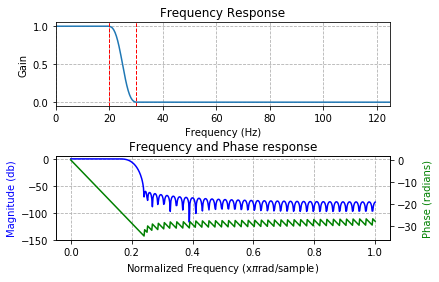

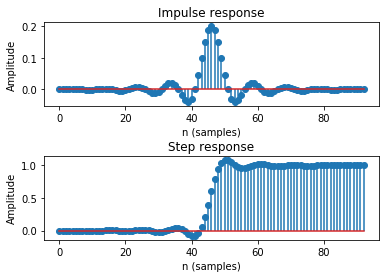

In [2]:
cutoff_hz = [25]   # low pass
width_hz = 10
ripple_db = 60
sfreq = 250.0
ftype = "lowpass"
window ="kaiser"

spfilt.show_filter(cutoff_hz, width_hz, ripple_db, sfreq, ftype, window);

# Design a bandpass filter

Note: this bundles the filter parameters in a dictionary for handy reuse and uses python `**` trickery to expand them

Filter length=229 distorts the first and last 0.4560  seconds of each epoch (= 114 samples at 250.0 samples / s)


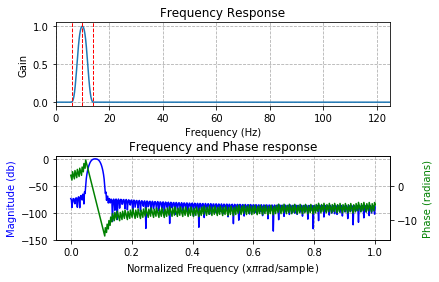

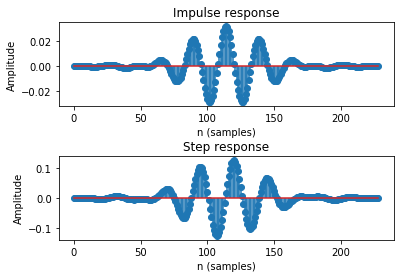

In [3]:
bp_filt = {
    "cutoff_hz": [8, 12],
    "width_hz": 4,
    "ripple_db": 60,
    "sfreq": 250.0,
    "ftype": "bandpass",
    "window": "kaiser"
}
f1, f2, s_edge, n_edge = spfilt.show_filter(**bp_filt)

# Generate test sinewave data

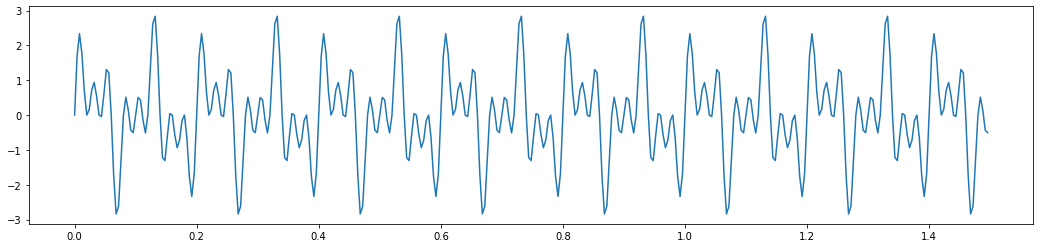

In [4]:
sines_specs = {
    "freq_list": [10, 25, 40],
    "amplitude_list": [1.0, 1.0, 1.0],
    "sampling_freq": 250,
}

# sinewave generator
t, y = spfilt._sins_test_data(**sines_specs, show_plot=True)
sines_dt = np.array(y, dtype=np.dtype([("sines", float)]))

# Apply the filter to selected columns

In [5]:
sines_dt_filt = spfilt.fir_filter_dt(
    sines_dt,
    ["sines"],
    **bp_filt,
    trim_edges=False
)

sines_dt_filt_trimmed = spfilt.fir_filter_dt(
    sines_dt,
    ["sines"],
    **bp_filt,
    trim_edges=True
)

# Plot before and after

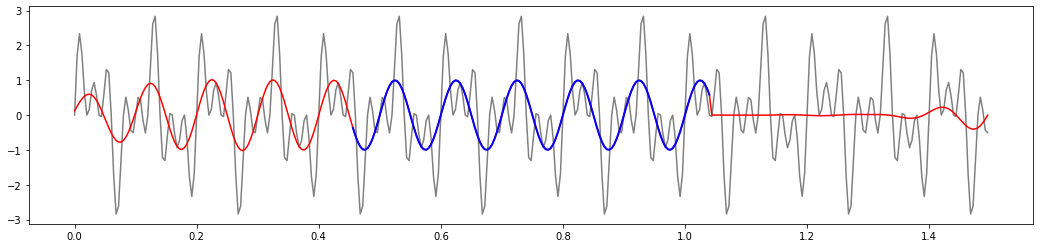

In [6]:
f, ax = plt.subplots(figsize=(18,4))
ax.plot(t, sines_dt, color='gray')
ax.plot(t, sines_dt_filt, color='red');
ax.plot(t[n_edge:-n_edge], sines_dt_filt_trimmed, color='blue', lw=2);


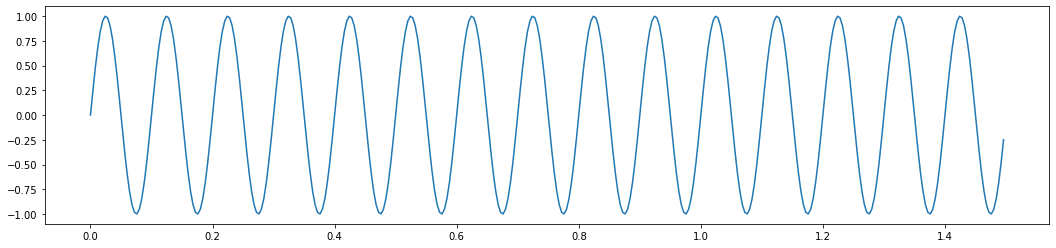

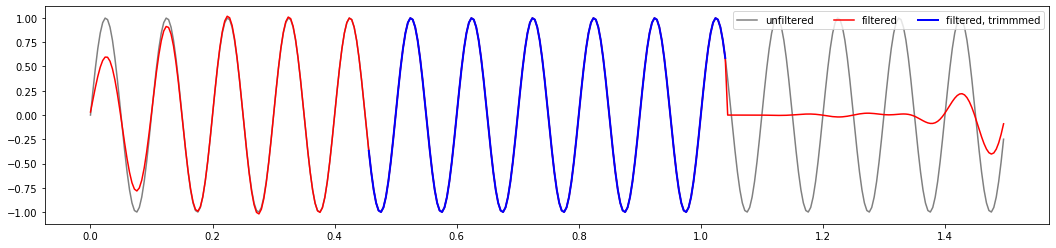

In [12]:
# 10 Hz filter for 10 Hz signal
sines_specs = {
    "freq_list": [10],
    "amplitude_list": [1.0],
    "sampling_freq": 250,
}

# sinewave generator
t, y = spfilt._sins_test_data(**sines_specs, show_plot=True)
sines_dt = np.array(y, dtype=np.dtype([("sines", float)]))

sines_dt_filt = spfilt.fir_filter_dt(
    sines_dt,
    ["sines"],
    **bp_filt,
    trim_edges=False
)

sines_dt_filt_trimmed = spfilt.fir_filter_dt(
    sines_dt,
    ["sines"],
    **bp_filt,
    trim_edges=True
)

f, ax = plt.subplots(figsize=(18,4))
ax.plot(t, sines_dt, color="gray", label="unfiltered")
ax.plot(t, sines_dt_filt, color="red", label="filtered");
ax.plot(t[n_edge:-n_edge], sines_dt_filt_trimmed, color="blue", lw=2, label="filtered, trimmmed");
ax.legend(ncol=3, loc='upper right');